# Data 422

### Data Wrangling

## Assignement 1

**20% of final grade** Total marks is **100 marks** (70 for R, 30 for Julia).

## Due date: 11am Monday 17 August 2020

The assignment must be submitted on the DATA 201 and 422 Learn page and should be **your own work, or done in pairs**.

### Avoid plagiarism (see this [video on academic plagiarism](https://www.youtube.com/embed/reGGPUrEsC0) ). If you are not sure what may constitute code plagiarism, read this [explanation on source code plagiarism](http://web.science.mq.edu.au/~mtaylor/ponline/index.php?id=source-code-plagiarism). Remember, when in doubt **declare your sources**. 

If you have any issues that affects your ability to work during the time allocated for the assignement, please DO CONTACT ME. We will find a suitable solution. In general this WON'T be an extension to the deadline (so that in the rest of the semester you are free from preoccupations). Most probably, I will ask you to submit what you have ready by the time the assignment is due, even if it is not everything we required, and I'll take into account special considerations. For any particular problem, please contact [Thomas Li](thomas.li@canterbury.ac.nz) or the TAs.

## Instruction

For this assignment you will work with a _.csv_ data-set. Your goal is to read it in, wrangle it, produce some plotting, in order to demonstrate that you are able to use the functions, plotting, and markdown format we have been learning.  
You shall hand in your work as a jupyter-lab R notebook (for the R part, and jupyter-lab Julia notebook for the Julia part) comprehending the code, the plots and, **very important**, enough comments and explanations for us to understand what you did, how you did it, and why you did it. Remember: no comments, no marks.  
You can either modify this notebook or write a new one from scratch: in that case, clearly indicate which question you are asking at each step. Notice that you may well want to **use more than one cell** per answer (using some cell for the code, some for the text, and so forth).

## Comment, explain, present your work in a clear way (we may remove marks for messy notebooks)

## R part (overall 70 marks)

Do use the tidyverse syntax I introduced in class and labs. If in doubt, refresh the lab material 1 to 4.

The first thing you may want to do is to load **tidyverse**:

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.1
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



### Task (a): import (5 marks)

Import the **hour.csv** dataset into R as a dataframe (we'll call it `bike_df`, but you can call it what you want). You can read about the dataset in the file `DataSet_Dictionary.txt`. (Alternatively, you might use your own .csv dataset of choice, but talk with me about it before doing it). 

Then perform the routine checks about the types of the columns, the missing values, and output a quick summary of the dataset.

_hint_ useful functions: `read_csv()`, `glimpse()`  
_hint_ useful libraries: `tidyverse`, `readr`, `skimr`, `vis_dat`

1st step: I use library(readr) and function read_csv() to read in csv files, and glimpse() to have a glimpse of the dataset.

Findings: I had a glimpse of the data, and I can see the variable names and types

In [2]:
library(readr)
bike_df <- "hour.csv" %>%
    read_csv()
glimpse(bike_df)

Parsed with column specification:
cols(
  instant = col_double(),
  dteday = col_date(format = ""),
  season = col_double(),
  yr = col_double(),
  mnth = col_double(),
  hr = col_double(),
  holiday = col_double(),
  weekday = col_double(),
  workingday = col_double(),
  weathersit = col_double(),
  temp = col_double(),
  atemp = col_double(),
  hum = col_double(),
  windspeed = col_double(),
  casual = col_double(),
  registered = col_double(),
  cnt = col_double()
)



Rows: 17,379
Columns: 17
$ instant    <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,…
$ dteday     <date> 2011-01-01, 2011-01-01, 2011-01-01, 2011-01-01, 2011-01-0…
$ season     <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ yr         <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ mnth       <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ hr         <dbl> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, …
$ holiday    <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ weekday    <dbl> 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6…
$ workingday <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ weathersit <dbl> 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3…
$ temp       <dbl> 0.24, 0.22, 0.22, 0.24, 0.24, 0.24, 0.22, 0.20, 0.24, 0.32…
$ atemp      <dbl> 0.2879, 0.2727, 0.2727, 0.2879, 0.2879, 0.2576, 0.2727, 0.…
$ hum        <dbl> 0.81, 0.

2nd step: in "skimr" library, I use skim() and kable() functions. If I only use skimr() without kable(), the result will contain too much information. In order to have a compact format, I use kable() as well. 

Findings: There are 2 column types, Date & Numeric. Only dteday column is in date format, and the remaining are in numeric.

In [3]:
library(skimr)
bike_df %>%
    skim() %>%
    knitr::kable()



|skim_type |skim_variable | n_missing| complete_rate|Date.min   |Date.max   |Date.median | Date.n_unique| numeric.mean|   numeric.sd| numeric.p0| numeric.p25| numeric.p50| numeric.p75| numeric.p100|numeric.hist |
|:---------|:-------------|---------:|-------------:|:----------|:----------|:-----------|-------------:|------------:|------------:|----------:|-----------:|-----------:|-----------:|------------:|:------------|
|Date      |dteday        |         0|             1|2011-01-01 |2012-12-31 |2012-01-02  |           731|           NA|           NA|         NA|          NA|          NA|          NA|           NA|NA           |
|numeric   |instant       |         0|             1|NA         |NA         |NA          |            NA| 8690.0000000| 5017.0294996|       1.00|   4345.5000|   8690.0000|  13034.5000|   17379.0000|▇▇▇▇▇        |
|numeric   |season        |         0|             1|NA         |NA         |NA          |            NA|    2.5016399|    1.1069181|       1.00| 

3rd step: I am checking the missing values by using "vis_dat" libiray and vis_miss() function.

Findings: There is no missing values from the below plot. If there is any, I will choose to use vis_miss(cluster = TRUE) to see where they are. 

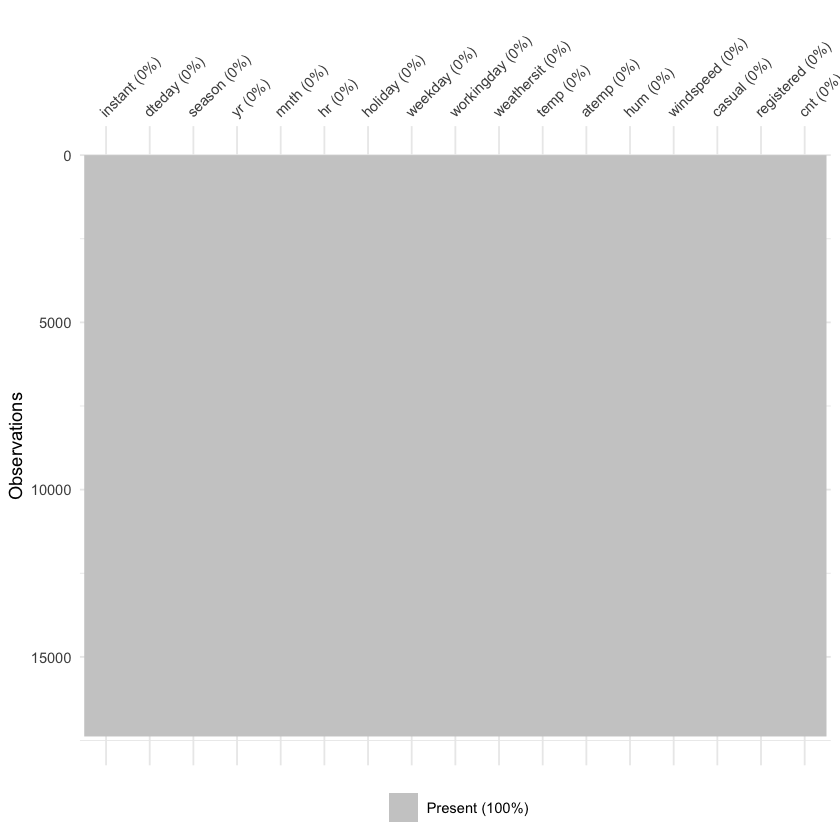

In [4]:
library(visdat)
bike_df %>%
    vis_miss()

### Task (b): working on rows (10 marks)


Working on `bike_df`, show that you can operate on rows: arranging them, getting the top _n_ according to some variable of your choice, filtering them (eventually using your own functions).

_hint_ useful functions: `arrange()`, `top_n()`, `filter()`  
_hint_ to define a function: `myfunction <- function(myargument,anotherargument) { bodyofthefunction }`

Answer: 
1st step: I create a function that can show us the top 10 cnt (count of total rental bikes) for each year in different weather condition by filtering the year and weathersit arguments. And the result will be displayed from the biggest to smallest cnt. 

In [5]:
myfunction <- function(target_year,target_weather) {
    filtered <- bike_df %>% 
        filter(yr == target_year,weathersit %in% target_weather)
    top_10 <- filtered %>%
        top_n(10,cnt)
    arrange_result <- top_10 %>%
        arrange(desc(cnt))
    return(arrange_result)
}

Here are the key indicators that will be used in calling functions. 

In [6]:
year_2011 <- 0 #Year 2011
year_2012 <- 1 #Year 2012
weather_1 <- 1 #Clear, Few clouds, Partly cloudy, Partly cloudy
weather_2 <- 2 #Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
weather_3 <- 3 #Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
weather_4 <- 4 #eavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

2rd step: call function. I use arguments: year_2011 and (weather_1,weather_2)
Findings: as we can see, all of the top 10 cnt in 2011 are in weathersit 1 only, with the amount from 609 to 651. 

In [7]:
myfunction(target_year = year_2011,target_weather = c(weather_1,weather_2))

instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5537,2011-08-23,3,0,8,14,0,2,1,1,0.72,0.6515,0.30,0.0896,149,502,651
3884,2011-06-15,2,0,6,17,0,3,1,1,0.74,0.6515,0.28,0.1045,83,555,638
5743,2011-09-01,3,0,9,17,0,4,1,1,0.72,0.6667,0.54,0.2537,61,567,628
6868,2011-10-18,4,0,10,17,0,2,1,1,0.60,0.6061,0.60,0.1343,72,553,625
5565,2011-08-24,3,0,8,18,0,3,1,1,0.74,0.6818,0.55,0.2985,102,519,621
6844,2011-10-17,4,0,10,17,0,1,1,1,0.56,0.5303,0.64,0.1343,80,540,620
7011,2011-10-24,4,0,10,17,0,1,1,1,0.52,0.5000,0.68,0.1343,87,527,614
3020,2011-05-10,2,0,5,17,0,2,1,1,0.64,0.6212,0.33,0.0000,79,532,611
5695,2011-08-30,3,0,8,17,0,2,1,1,0.72,0.6515,0.42,0.1940,62,549,611


3rd step: call function. I use arguments: year_2012 and (weather_1,weather_2)
Findings: AS below, 90% of the top 10 cnt in 2012 are in weathersit 1, with the amount from 943 to 977. 

In [8]:
myfunction(target_year = year_2012,target_weather = c(weather_1,weather_2))

instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
14774,2012-09-12,3,1,9,18,0,3,1,1,0.66,0.6212,0.44,0.2537,91,886,977
14965,2012-09-20,3,1,9,17,0,4,1,1,0.64,0.6212,0.50,0.2239,91,885,976
14749,2012-09-11,3,1,9,17,0,2,1,1,0.70,0.6364,0.28,0.0000,168,802,970
14726,2012-09-10,3,1,9,18,0,1,1,1,0.62,0.6212,0.35,0.2985,111,857,968
15085,2012-09-25,4,1,9,17,0,2,1,1,0.66,0.6212,0.39,0.2836,107,860,967
15781,2012-10-24,4,1,10,17,0,3,1,1,0.66,0.6212,0.47,0.0000,87,876,963
10623,2012-03-23,2,1,3,17,0,5,1,2,0.72,0.6515,0.42,0.1642,264,693,957
15109,2012-09-26,4,1,9,17,0,3,1,1,0.74,0.6667,0.48,0.2985,77,876,953
15445,2012-10-10,4,1,10,17,0,3,1,1,0.58,0.5455,0.43,0.2239,91,857,948


Conclusion: based on my function, I found the number of bike users highly depended on the weather condition, because we can observe that the number of users have the largest volume when the wweather is Clear, Few clouds, Partly cloudy, Partly cloudy (weathersit 1). This also matches with my assumption. 

### Task (c): working on columns (10 marks)

Working on `bike_df`, show that you can operate on columns: selecting some of them, dropping other, renaming them, reordering them, ...


_hint_ useful functions: `select()`, `rename()`, ...

select: I would like to have a look between column 'temp' and column 'windspeed'.

In [9]:
bike_df %>%
    select(temp:windspeed)%>%
    head()

temp,atemp,hum,windspeed
<dbl>,<dbl>,<dbl>,<dbl>
0.24,0.2879,0.81,0.0000
0.22,0.2727,0.80,0.0000
0.22,0.2727,0.80,0.0000
0.24,0.2879,0.75,0.0000
0.24,0.2879,0.75,0.0000
0.24,0.2576,0.75,0.0896


drop: I want to see the dataset without the above 4 columns.

In [10]:
bike_df %>%
    select(-c(temp:windspeed))%>%
    tail()

instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,casual,registered,cnt
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
17374,2012-12-31,1,1,12,18,0,1,1,2,10,112,122
17375,2012-12-31,1,1,12,19,0,1,1,2,11,108,119
17376,2012-12-31,1,1,12,20,0,1,1,2,8,81,89
17377,2012-12-31,1,1,12,21,0,1,1,1,7,83,90
17378,2012-12-31,1,1,12,22,0,1,1,1,13,48,61
17379,2012-12-31,1,1,12,23,0,1,1,1,12,37,49


Reorder: I think these 4 columns' information are not that important for the timebeing. I am going to reorder these 4 variables and move them to the end.

In [11]:
names(bike_df)
bike_df <- bike_df %>%
  select(instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,casual,registered,cnt,temp,atemp,hum,windspeed)


[1] "instant"    "dteday"     "season"     "yr"         "mnth"      
 [6] "hr"         "holiday"    "weekday"    "workingday" "weathersit"
[11] "temp"       "atemp"      "hum"        "windspeed"  "casual"    
[16] "registered" "cnt"

rename: I think 'dteday' might be a misspelling. I am going to rename it.

In [12]:
names(bike_df)[names(bike_df)=='dteday'] <- 'dateday'

bike_df %>%
    head()

instant,dateday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,casual,registered,cnt,temp,atemp,hum,windspeed
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2011-01-01,1,0,1,0,0,6,0,1,3,13,16,0.24,0.2879,0.81,0.0000
2,2011-01-01,1,0,1,1,0,6,0,1,8,32,40,0.22,0.2727,0.80,0.0000
3,2011-01-01,1,0,1,2,0,6,0,1,5,27,32,0.22,0.2727,0.80,0.0000
4,2011-01-01,1,0,1,3,0,6,0,1,3,10,13,0.24,0.2879,0.75,0.0000
5,2011-01-01,1,0,1,4,0,6,0,1,0,1,1,0.24,0.2879,0.75,0.0000
6,2011-01-01,1,0,1,5,0,6,0,2,0,1,1,0.24,0.2576,0.75,0.0896


### Task (d): groups and not (10 marks)

Working on `bike_df`, show that you can produce new variables (columns) and modify existing one; show also that you can operate on the dataframe as a whole and on groups. See *Readme.txt* to get an understanding of the variable scaling applied.

_hint_ useful functions: `mutate()`, `group_by()`, `summarise()`, `tally()`, ...

Add new variables: Add a new column at the end bu using mutate(), which will contain the information of the percentage  of casual users. (result = casual / cnt * 100)
Findings: I assume that most casual users percentages are less than registered user. The assumption is correct, and they do have some special cases that casual users percentages are greater in some days. 

In [13]:
bike_df <- bike_df %>%
    mutate(casual_percent = casual/cnt*100)
bike_df %>%
    head(5)

instant,dateday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,casual,registered,cnt,temp,atemp,hum,windspeed,casual_percent
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2011-01-01,1,0,1,0,0,6,0,1,3,13,16,0.24,0.2879,0.81,0,18.75000
2,2011-01-01,1,0,1,1,0,6,0,1,8,32,40,0.22,0.2727,0.80,0,20.00000
3,2011-01-01,1,0,1,2,0,6,0,1,5,27,32,0.22,0.2727,0.80,0,15.62500
4,2011-01-01,1,0,1,3,0,6,0,1,3,10,13,0.24,0.2879,0.75,0,23.07692
5,2011-01-01,1,0,1,4,0,6,0,1,0,1,1,0.24,0.2879,0.75,0,0.00000


Change on the column: I think the existing column 'atemp' was kept too many decimal points, so I am going to operate it on the column to save only 2 decimal points by using tranmute() and round() function.

In [14]:
bike_df <- bike_df %>%
    transmute(instant,dateday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,casual,registered,cnt,temp,atemp = round(atemp,2),hum,windspeed)
bike_df %>%
    sample_n(5)

instant,dateday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,casual,registered,cnt,temp,atemp,hum,windspeed
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1412,2011-03-04,1,0,3,2,0,5,1,2,0,2,2,0.18,0.18,0.64,0.1940
15976,2012-11-03,4,1,11,8,0,6,0,2,10,132,142,0.34,0.30,0.46,0.2985
17161,2012-12-22,1,1,12,19,0,6,0,1,9,51,60,0.24,0.21,0.48,0.3582
11452,2012-04-27,2,1,4,8,0,5,1,1,17,575,592,0.40,0.41,0.50,0.0000
5509,2011-08-22,3,0,8,10,0,1,1,1,36,85,121,0.70,0.65,0.48,0.2836


Group and compute mean: I would like to group the data by year and month by using group_by() function. And I use summarise() function to take the full column of 'cnt' and compute the mean for each month by using mean() function.

Findings: I can see the mean for each month was increasing, especially from Jan 2011 to Sep 2012, which tells us the number of users was growing and bike was getting poplular. 

In [15]:
bike_df %>%
    group_by(yr,mnth) %>%
    summarise(mean_cnt_month = mean(cnt))%>%
    head(24)

`summarise()` regrouping output by 'yr' (override with `.groups` argument)



yr,mnth,mean_cnt_month
<dbl>,<dbl>,<dbl>
0,1,55.50727
0,2,74.29122
0,3,87.73288
0,4,131.94715
0,5,182.55511
0,6,199.32222
0,7,189.97446
0,8,186.99179
0,9,177.70990


Group: I also group the year and compute the mean for each year to see the difference.

Findings: The number of bike users were nearly doubled. 

In [16]:
bike_df %>%
    group_by(yr) %>%
    summarise(mean_cnt_year = mean(cnt))

`summarise()` ungrouping output (override with `.groups` argument)



yr,mean_cnt_year
<dbl>,<dbl>
0,143.7944
1,234.6664


Tally() function: I want to check how many hours for each month has been recorded in the dataset.

In [17]:
bike_df %>%
    group_by(yr,mnth) %>%  
    tally()

yr,mnth,n
<dbl>,<dbl>,<int>
0,1,688
0,2,649
0,3,730
0,4,719
0,5,744
0,6,720
0,7,744
0,8,731
0,9,717


### Task (e): wide, long, tidy (10 marks)

Show that you can go back and forth between the long and the wide format of a dataframe. Then produce a tidy version of `bike_df` (or, if you think the original one is is already in the tidy data shape, explain why).

_hint_ useful functions: `spread()`, `gather()`, `na.omit()`, ...

1st step: I want to check how many rows and columns in bike_df data.

Findings: There are 17379 rows and 17 columns in this data set.

In [18]:
nrow(bike_df)
ncol(bike_df)

[1] 17379

[1] 17

2nd step: I will remove all NAs by using na.omit() function.

Findings: There isn't any NA values. 

In [19]:
bike_df<-
    bike_df %>%
    na.omit()
nrow(bike_df)
ncol(bike_df)

[1] 17379

[1] 17

3rd step: I have made the data tidy by using below functions gather(). 
Reasons for being tidy:
    1. each variable forms one clolumn. 
    2. we have each observation forming a row.
    3. the observational unit forms a table. 

In [20]:
colnames(bike_df)
bike_df2 <- 
    bike_df %>%
    gather(
        key = variables,
        value = value,
        'casual':'registered')
bike_df2 %>%
    sample_n(10)

[1] "instant"    "dateday"    "season"     "yr"         "mnth"      
 [6] "hr"         "holiday"    "weekday"    "workingday" "weathersit"
[11] "casual"     "registered" "cnt"        "temp"       "atemp"     
[16] "hum"        "windspeed"

instant,dateday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,cnt,temp,atemp,hum,windspeed,variables,value
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1177,2011-02-21,1,0,2,19,1,1,0,2,49,0.24,0.21,0.87,0.3582,registered,49
11044,2012-04-10,2,1,4,7,0,2,1,1,384,0.34,0.35,0.71,0.1045,casual,16
3002,2011-05-09,2,0,5,23,0,1,1,1,61,0.50,0.48,0.68,0.0896,casual,16
10,2011-01-01,1,0,1,9,0,6,0,1,14,0.32,0.35,0.76,0.0000,registered,6
11693,2012-05-07,2,1,5,9,0,1,1,2,350,0.50,0.48,0.82,0.2239,registered,289
14928,2012-09-19,3,1,9,4,0,3,1,2,10,0.52,0.50,0.68,0.3582,casual,0
15737,2012-10-22,4,1,10,21,0,1,1,1,174,0.48,0.47,0.67,0.0896,registered,155
978,2011-02-13,1,0,2,9,0,0,0,2,47,0.24,0.23,0.60,0.2239,registered,35
6013,2011-09-13,3,0,9,2,0,2,1,1,2,0.60,0.58,0.78,0.0000,registered,0


### Task (f): plot (10 marks)

Produce a beautiful graphical representation of the data in `bike_df` or of _some_ of the data in `bike_df`. You can try different geometries, themes, mappings, ... . Make sure you label the plots with titles, and axis labels. Notice that the focus is on the use of *plotting as a data model*, rather than on the *statistical modelling* of the data.
\[ Hint: if you can't find any plotting idea, try focusing on the count of total rental bikes, and how it varies through time, season, weather, temperature, humidty, wind-speed. \]

_hint_ useful functions: `ggplot()`, `ylab()`, `xlab()`, `geom_...()`, `aes()`, `facet_...()`, ...

Plot: the plot I draw has demonstrated the changes for the number of the casual and registered from Jan 2011 to Jan 2013 at different weather condition level. 

Findings: In weather condition 1, the number is the greatest compared with the other 3 conditions within the same figure scale.

Explanation: I choose 'dateday' for xlab, 'value' for ylab, 'variables' for color, 'weathersit' for facet_wrap.

Note: I use shape "." to display the data in the plot. I have tried same pch in R, which looks terrible. But in Jupyternb, pch "." looks fine. So if you open the plot in different platform, it will show a bit differently. 

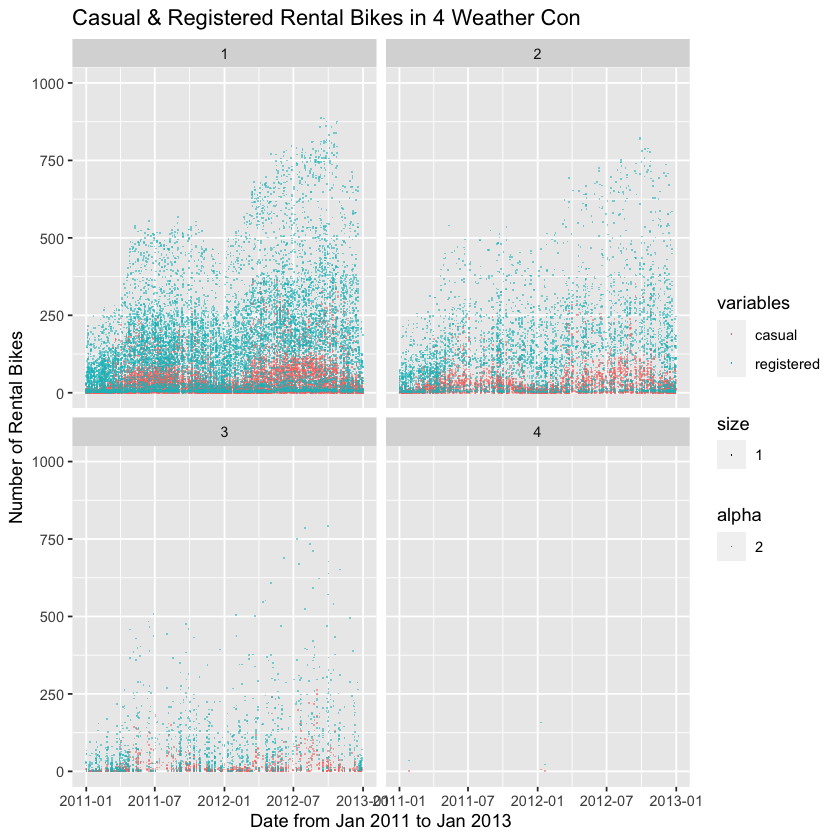

In [21]:
library(ggplot2)
ggplot_Zack <- 
    bike_df2 %>% ggplot(mapping = aes(x=dateday, y=value, color = variables, size = 1, alpha =2))+
        geom_point(shape = ".") +
        scale_y_continuous(limits = c(0, 1000))+
        facet_wrap(~weathersit)+
        labs(
            title = "Casual & Registered Rental Bikes in 4 Weather Con",
            x = "Date from Jan 2011 to Jan 2013",
            y = "Number of Rental Bikes")

ggplot_Zack

### Task (g): save (5 marks)

Save your plot from Task (f) and your tidy dataset from Task (g) to disk. 

_hint_ useful functions: `write_csv()`, `ggsave()`,...

In [22]:
ggsave(ggplot_Zack,filename = "Assignment_plot.pdf",width = 12,height = 9)


In [23]:
bike_df2 %>%
  write_csv("bike_df2.csv")

### Challenge question (10 marks)

You are the data scientist working for a bike rental company. The `hour.csv` is the data you have available. The bike rental CEO sometimes wakes up in the morning with these strange ideas, and you get to test them.

One of the key element for the company is being sure that there are always enough bikes available for the users. So, we need to understand what makes a user rent a bike and what makes a user NOT rent a bike.
Your CEO noticed thinks that one of the peak times for the registered users renting bikes is between 6am and 10am.

Task (1): make a plot to check that (take seasonality into account in the plot).

She also thought about an interesting hypothesis. A registered user usually finish working around 5pm. Between 5pm and 10pm, they notice the weather: in particular, the registered users are sensible to how good the weather is, and how stable it is. The morning after, between 6am and 10am, the amount of registered users renting a bike to go to work depends on the previous afternoon weather.

Task (2): make one or more plot to test this hypothesis (again, consider seasonality in the plot).

**Hint: Make your plots with some colour, good font size and visualisation.**

I have combined 2 columns "yr"&"season" into one variable. 0_1 means 2011 Spring. 1_2 mean 2012 summer. 

In [24]:
bike_df3 <- bike_df2 %>%
    unite("yr_season",yr,season)

In [25]:
head(bike_df3,5)

instant,dateday,yr_season,mnth,hr,holiday,weekday,workingday,weathersit,cnt,temp,atemp,hum,windspeed,variables,value
<dbl>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,2011-01-01,0_1,1,0,0,6,0,1,16,0.24,0.29,0.81,0,casual,3
2,2011-01-01,0_1,1,1,0,6,0,1,40,0.22,0.27,0.80,0,casual,8
3,2011-01-01,0_1,1,2,0,6,0,1,32,0.22,0.27,0.80,0,casual,5
4,2011-01-01,0_1,1,3,0,6,0,1,13,0.24,0.29,0.75,0,casual,3
5,2011-01-01,0_1,1,4,0,6,0,1,1,0.24,0.29,0.75,0,casual,0


I filter out some rows whose variable name is 'registered', and grouped them by yr_season & hr. Finally, I sum up the value for registered rental. 

In [26]:
reg_hr <- bike_df3 %>%
    filter(variables == "registered")%>%
    group_by(yr_season,hr)%>%
    summarise(sum_value_hr = sum(value))
reg_hr %>%
    head(10)

`summarise()` regrouping output by 'yr_season' (override with `.groups` argument)



yr_season,hr,sum_value_hr
<chr>,<dbl>,<dbl>
0_1,0,1376
0_1,1,905
0_1,2,579
0_1,3,291
0_1,4,129
0_1,5,420
0_1,6,1955
0_1,7,5522
0_1,8,12565


I draw 8 plots, the xlab is hours from 0 to 24, and the ylab is the total registered rental for each hour. And then they are divided into 8 plots by its year and season.

Findings: as we can see from the plot, the peak time for registered user renting a bike is 15-20. As for 6-10, we can also find that the volume is pretty big as well, but it is still less than the number from 15 to 20. 

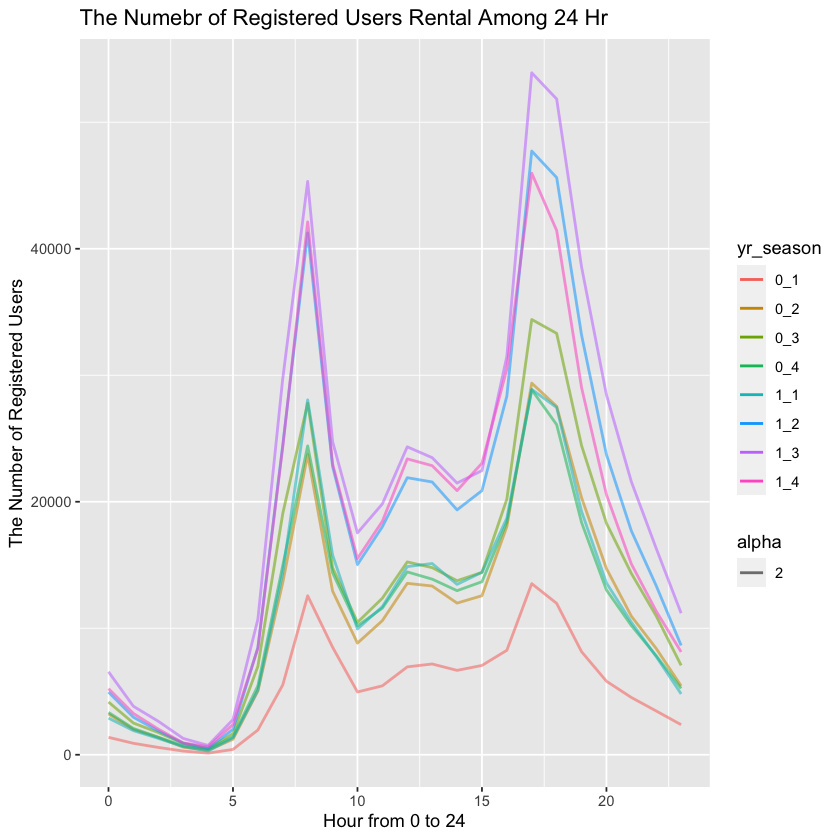

In [27]:
ggplot_check <- 
    reg_hr %>% ggplot(mapping = aes(x=hr, y=sum_value_hr, color = yr_season,size = 1, alpha =2))+
        geom_line(size = 0.8)+
        labs(
            title = "The Numebr of Registered Users Rental Among 24 Hr",
            x = "Hour from 0 to 24",
            y = "The Number of Registered Users")

ggplot_check

I have saved the plot.

In [28]:
ggsave(ggplot_check,filename = "check.pdf",width = 12,height = 9)

In [29]:
weather_17_22 <- bike_df3 %>%
    filter(hr == c(17:22))%>%
    select(yr_season,dateday,hr,weathersit)

weather_5_10%>%
    ggplot(mapping = aes(x=hr, y=weathersit, color = yr_season,size = 1, alpha =2))+
        geom_point(size = 0.8)

ERROR: Error in eval(lhs, parent, parent): object 'weather_5_10' not found


In [33]:
Date_17_22 <- weather_17_22 %>%
    mutate(new_date = dateday + 1)
Date_17_22 %>%
    head(5)

yr_season,dateday,hr,weathersit,new_date
<chr>,<date>,<dbl>,<dbl>,<date>
0_1,2011-01-05,17,1,2011-01-06
0_1,2011-01-05,18,1,2011-01-06
0_1,2011-01-05,19,1,2011-01-06
0_1,2011-01-05,20,1,2011-01-06
0_1,2011-01-05,21,1,2011-01-06


In [31]:
reg_hr <- bike_df3 %>%
    filter(variables == "registered")%>%
    group_by(dateday,yr_season,hr)%>%
    summarise(sum_value_hr = sum(value))
reg_hr

`summarise()` regrouping output by 'dateday', 'yr_season' (override with `.groups` argument)



dateday,yr_season,hr,sum_value_hr
<date>,<chr>,<dbl>,<dbl>
2011-01-01,0_1,0,13
2011-01-01,0_1,1,32
2011-01-01,0_1,2,27
2011-01-01,0_1,3,10
2011-01-01,0_1,4,1
2011-01-01,0_1,5,1
2011-01-01,0_1,6,0
2011-01-01,0_1,7,2
2011-01-01,0_1,8,7
